In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.linear_model import LinearRegression

In [160]:
def students(filename):
    df = pd.read_csv(filename, index_col="StudentID")
    return df

In [208]:
df = students("student_performance_1.csv")
df.head(10)

,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
StudentID,,,,,,,,
1,John,Male,74,89,65,1,High,85
2,Sarah,Female,53,71,54,2,Medium,94
3,Alex,Male,70,83,76,0,Low,80
4,Michael,Male,69,56,61,3,High,91
5,Emma,Female,92,63,72,2,Medium,97
6,Olivia,Female,97,72,86,1,High,84
7,Daniel,Male,89,51,60,0,Low,80
8,Sophia,Female,69,94,88,1,Medium,84
9,James,Male,81,73,97,2,Low,86


In [12]:
df.shape

(10, 8)

In [14]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       10 non-null     object
 1   Gender                     10 non-null     object
 2   AttendanceRate             10 non-null     int64 
 3   StudyHoursPerWeek          10 non-null     int64 
 4   PreviousGrade              10 non-null     int64 
 5   ExtracurricularActivities  10 non-null     int64 
 6   ParentalSupport            10 non-null     object
 7   FinalGrade                 10 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes


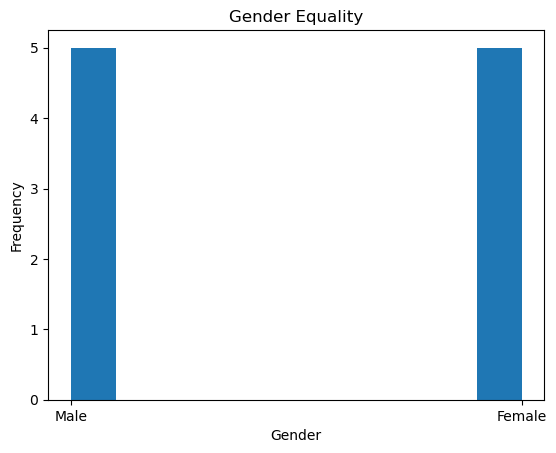

In [20]:
#To check the total number of gender in the class
plt.hist(x=df["Gender"])
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Gender Equality")
plt.show();

#### THE VISUALIZATION ABOVE SHOWS THAT THE CLASS HAS SAME NUMBER OF MALE AND FEMALE

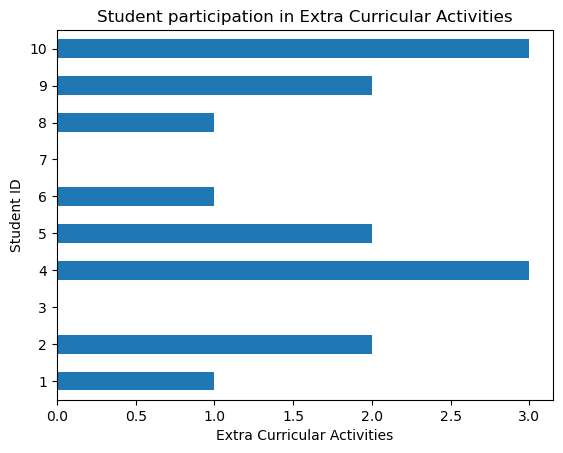

In [45]:
df["ExtracurricularActivities"].plot(kind="barh")
plt.xlabel("Extra Curricular Activities")
plt.ylabel("Student ID")
plt.title("Student participation in Extra Curricular Activities");

### STUDENT WITH ID 3&7 DO NOT PARTICIPATE IN EXTRA CURRICULAR

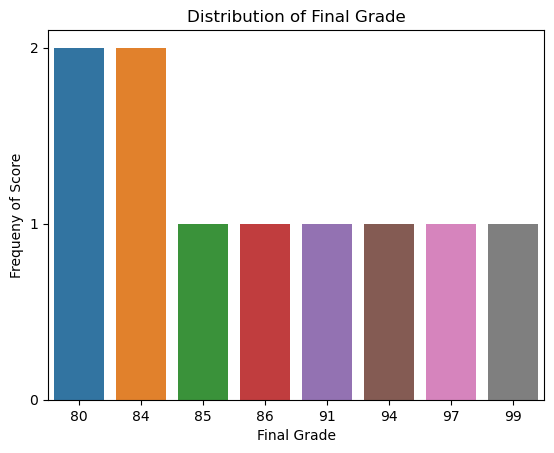

In [170]:
sns.countplot(x="FinalGrade", data=df)
plt.xlabel("Final Grade")
plt.ylabel("Frequeny of Score")
plt.yticks(np.arange(0, 3, 1))
plt.title("Distribution of Final Grade");

### THE ABOVE GRAPH SHOWS THAT TWO STUDENTS SCORE 80 AND 84, WHILE OTHER SCORES WERE OBTAINED BY INDIVIDUALLY

In [117]:
df1 = df.pivot_table(["FinalGrade", "AttendanceRate", "PreviousGrade"], index="Gender")
df1

,AttendanceRate,FinalGrade,PreviousGrade
Gender,,,
Female,73.2,91.6,72.2
Male,76.6,84.4,71.8


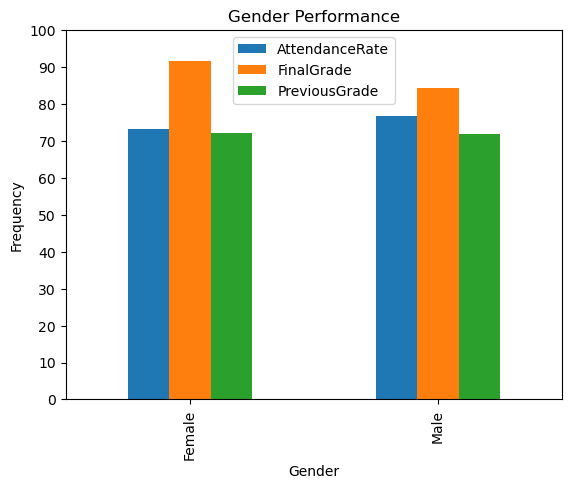

In [167]:
df1.plot(kind="bar")
plt.xlabel("Gender")
plt.xticks(range(len(df1)), labels=df1.index)
plt.yticks(np.arange(0, 110, 10))
plt.ylabel("Frequency")
plt.title("Gender Performance");

In [179]:
df2 = df.pivot_table(["StudyHoursPerWeek"], index=["ParentalSupport"])
df2

,StudyHoursPerWeek
ParentalSupport,
High,76.25
Low,69.00
Medium,76.00


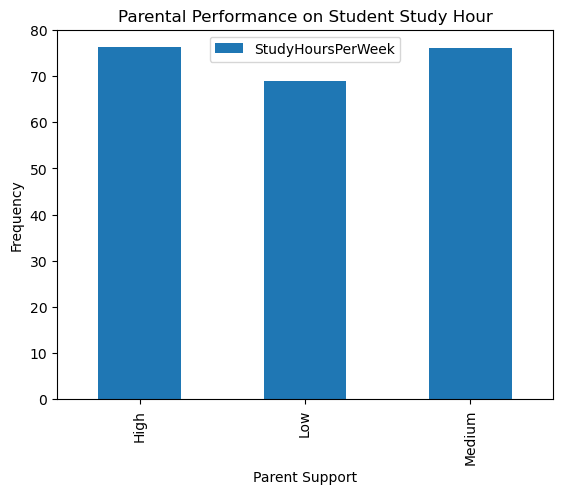

In [188]:
df2.plot(kind="bar")
plt.xlabel("Parent Support")
plt.ylabel("Frequency")
plt.title("Parental Performance on Student Study Hour");

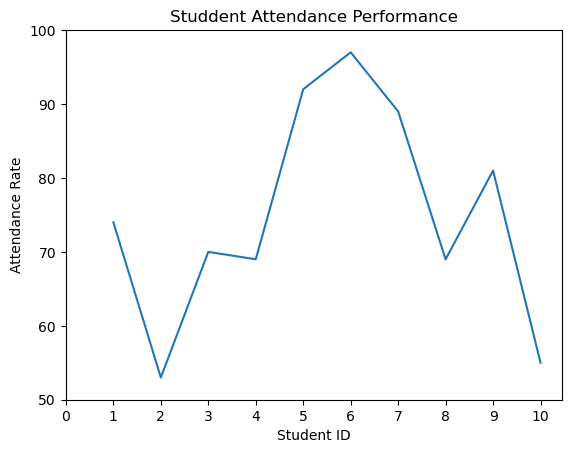

In [209]:
plt.plot(df["AttendanceRate"])
plt.xlabel("Student ID")
plt.ylabel("Attendance Rate")
plt.xticks(range(0,11))
plt.yticks(np.arange(50, 110, 10))
plt.title("Studdent Attendance Performance");

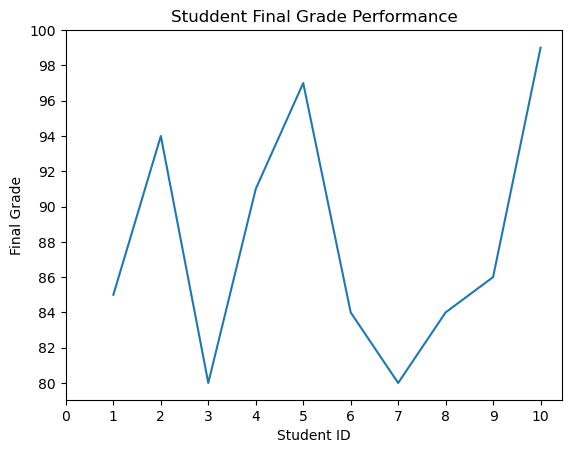

In [224]:
plt.plot(df["FinalGrade"])
plt.xlabel("Student ID")
plt.ylabel("Final Grade")
plt.xticks(range(0,11))
plt.yticks(np.arange(80, 101,2))
plt.title("Studdent Final Grade Performance");

In [225]:
features = ["AttendanceRate"]
X_train = df[features]
X_train.shape

(10, 1)

In [226]:
target = "FinalGrade"
y_train = df[target]
y_train.shape

(10,)

In [227]:
y_mean = y_train.mean()
y_mean

88.0

In [228]:
y_pred_mean = [y_mean] * len(y_train)
y_pred_mean

[88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0, 88.0]

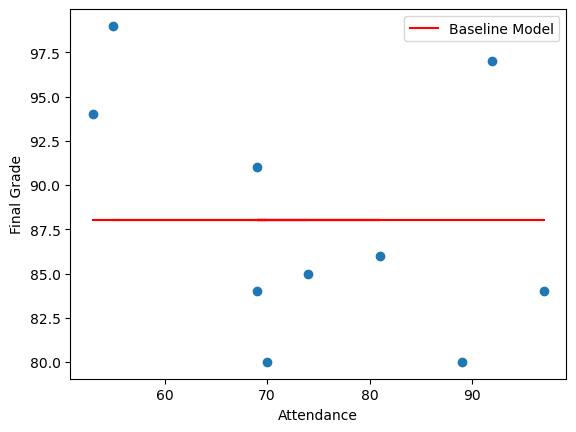

In [229]:
plt.plot(X_train, y_pred_mean, color="red", label="Baseline Model")
plt.scatter(x=df.AttendanceRate, y=df.FinalGrade)
plt.xlabel("Attendance")
plt.ylabel("Final Grade")
plt.legend();

In [230]:
mae_baseline = mean_absolute_error(y_train, y_pred_mean)
print(f"The Mean Absolute Error: {mae_baseline}")

The Mean Absolute Error: 5.8


In [231]:
model = LinearRegression()

In [232]:
model.fit(X_train, y_train)

LinearRegression()

In [233]:
y_pred_training = model.predict(X_train)
y_pred_training

array([88.16397403, 91.99003473, 88.8927475 , 89.07494086, 84.88449343,
       83.9735266 , 85.43107353, 89.07494086, 86.88862046, 91.62564799])

In [234]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"The MAE: {mae_training}")

The MAE: 4.690271276863454


In [235]:
intercept = model.intercept_
print(f"The Intercept: {intercept}")

The Intercept: 101.64628315466304


In [236]:
coeffiecient = model.coef_[0]
print(f"The Coefficient {coeffiecient}")

The Coefficient -0.18219336655090845


In [237]:
print(f"Final Grade = {intercept} + {coeffiecient} * Attendance")

Final Grade = 101.64628315466304 + -0.18219336655090845 * Attendance


0.9741769986973781


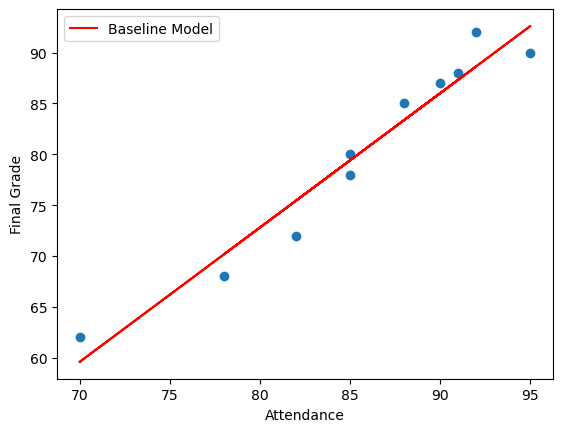

In [18]:
plt.plot(X_train, y_pred_training, color="red", label="Baseline Model")
plt.scatter(x=df.AttendanceRate, y=df.FinalGrade)
plt.xlabel("Attendance")
plt.ylabel("Final Grade")
plt.legend();
correlation = df.AttendanceRate.corr(df.FinalGrade)
print(correlation)

In [238]:
X_test = pd.read_csv("student_performance_1.csv")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    88.163974
1    91.990035
2    88.892747
3    89.074941
4    84.884493
dtype: float64